Дана статистика пользователей adult.csv.  
Получите значения AUC для различных моделей и их параметров.  
Используйте как минимум 3 различные модели классификации.  
Решением будет ссылка на гитхаб с ноутбуком.  

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv( 'adult.csv' )
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data[data['capital-gain'] > 50000]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
346,39,Private,198654,HS-grad,9,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
357,50,Self-emp-not-inc,165001,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K
418,54,Self-emp-inc,159219,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
692,41,Private,191547,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48109,47,Private,155664,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
48253,43,Self-emp-inc,62026,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
48371,66,Private,115498,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,?,>50K
48519,47,Private,294913,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


In [6]:
data = data[data['capital-gain'] < 50000]

99999 похоже на аномалии

In [7]:
data = data[~data.isin(['?'])]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48598 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48598 non-null  int64 
 1   workclass        45804 non-null  object
 2   fnlwgt           48598 non-null  int64 
 3   education        48598 non-null  object
 4   educational-num  48598 non-null  int64 
 5   marital-status   48598 non-null  object
 6   occupation       45794 non-null  object
 7   relationship     48598 non-null  object
 8   race             48598 non-null  object
 9   gender           48598 non-null  object
 10  capital-gain     48598 non-null  int64 
 11  capital-loss     48598 non-null  int64 
 12  hours-per-week   48598 non-null  int64 
 13  native-country   47751 non-null  object
 14  income           48598 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.9+ MB


In [9]:
data.isna().sum()

age                   0
workclass          2794
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2804
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      847
income                0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44993 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              44993 non-null  int64 
 1   workclass        44993 non-null  object
 2   fnlwgt           44993 non-null  int64 
 3   education        44993 non-null  object
 4   educational-num  44993 non-null  int64 
 5   marital-status   44993 non-null  object
 6   occupation       44993 non-null  object
 7   relationship     44993 non-null  object
 8   race             44993 non-null  object
 9   gender           44993 non-null  object
 10  capital-gain     44993 non-null  int64 
 11  capital-loss     44993 non-null  int64 
 12  hours-per-week   44993 non-null  int64 
 13  native-country   44993 non-null  object
 14  income           44993 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [12]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [13]:
data['income'] = data['income'].replace({'<=50K': 0, '>50K': 1})

In [14]:
data['workclass'] = data['workclass'].replace({'Self-emp-not-inc': 'Other', 'Local-gov': 'Gov', 'State-gov': 'Gov', 
                                               'Self-emp-inc': 'Other','Federal-gov': 'Gov' })

In [15]:
data.loc[~data['native-country'].isin(['United-States']), "native-country"] = 'Other'

In [16]:
label_enc = LabelEncoder()
data.loc[:, 'gender'] = label_enc.fit_transform(data['gender'])

In [17]:
data.drop(['fnlwgt', 'education'], axis=1, inplace=True)

In [18]:
data.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0
2,28,Gov,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1
5,34,Private,6,Never-married,Other-service,Not-in-family,White,1,0,0,30,United-States,0


In [19]:
new_data = pd.get_dummies(data)

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [21]:
X = new_data.loc[:, new_data.columns != 'income']
y = new_data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [22]:
min_max_scaler = MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(new_data)
df_norm = pd.DataFrame(np_scaled)
headers = list(new_data.columns.values)
df_norm.columns = headers
df_norm.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Gov,workclass_Other,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native-country_Other,native-country_United-States
0,-0.780822,-0.200000,1.0,-1.00000,-1.0,-0.204082,-1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0
1,-0.424658,0.066667,1.0,-1.00000,-1.0,0.000000,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
2,-0.698630,0.466667,1.0,-1.00000,-1.0,-0.204082,1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
3,-0.260274,0.200000,1.0,-0.62779,-1.0,-0.204082,1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0
4,-0.534247,-0.333333,1.0,-1.00000,-1.0,-0.408163,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0


In [23]:
model = LogisticRegression()

In [24]:
model.fit( X_train, y_train )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [25]:
predictions = model.predict_proba(X_test)

In [26]:
model.score(X_test, y_test)

0.8348705411712413

In [27]:
from sklearn.metrics import auc

In [28]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [29]:
auc( fpr, tpr )

0.8761287578462416

In [38]:
svc = SVC(probability=True)

In [39]:
svc.fit( X_train, y_train)

SVC(probability=True)

In [40]:
predictions = svc.predict_proba(X_test)

In [41]:
svc.score(X_test, y_test)

0.8097566396266251

In [42]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [43]:
auc( fpr, tpr )

0.8689874696097822

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
depths = np.arange(1,10)
grid = {'max_depth': depths}#, 'max_features': features_num}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='neg_log_loss', cv=5)

In [47]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_log_loss')

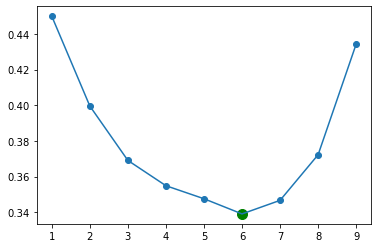

In [48]:
scores = [-x for x in gridsearch.cv_results_['mean_test_score']]
plt.plot(depths, scores)
plt.scatter(depths, scores)
best_point = np.argmin(scores)
plt.scatter(depths[best_point], scores[best_point], c='g', s=100)

In [49]:
clf_final = DecisionTreeClassifier(max_depth=6)

In [50]:
clf_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [51]:
predictions = clf_final.predict_proba(X_test)

In [52]:
clf_final.score(X_test, y_test)

0.8565396155128348

In [53]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [54]:
auc( fpr, tpr )

0.8941718267057456